# Gas Well Test Analysis : Isochronal Test

> Divyanshu Vyas | Oil and Gas Data Science/Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
t = [48,12,15,12,17,12,18,12,72,100]

pw = [1952,1761,1952,1694,1952,1510,1952,1320,1151,1952]

q = [0,2.6,0,3.3,0,5.0,0,6.3,6.0,0]

labels = ['S0','F1','S1','F2','S2','F3','S3','F4','EF','S_f']

In [6]:
len(t),len(pw),len(q),len(labels)

(10, 10, 10, 10)

In [8]:
df = pd.DataFrame({'Test':labels,'T(hrs)':t,'Pw':pw,'Q(MMscf/d)':q})

In [9]:
df

,Test,T(hrs),Pw,Q(MMscf/d)
0,S0,48,1952,0.0
1,F1,12,1761,2.6
2,S1,15,1952,0.0
3,F2,12,1694,3.3
4,S2,17,1952,0.0
5,F3,12,1510,5.0
6,S3,18,1952,0.0
7,F4,12,1320,6.3
8,EF,72,1151,6.0
9,S_f,100,1952,0.0


In [12]:
pbar = 1952 #psia

In [13]:
df['Pbar2 - Pwf2'] = pbar**2 - df['Pw']**2

In [14]:
df

,Test,T(hrs),Pw,Q(MMscf/d),Pbar2 - Pwf2
0,S0,48,1952,0.0,0
1,F1,12,1761,2.6,709183
2,S1,15,1952,0.0,0
3,F2,12,1694,3.3,940668
4,S2,17,1952,0.0,0
5,F3,12,1510,5.0,1530204
6,S3,18,1952,0.0,0
7,F4,12,1320,6.3,2067904
8,EF,72,1151,6.0,2485503
9,S_f,100,1952,0.0,0


In [16]:
#AOF conditions
delP2_aof = pbar**2 - 14.7**2

delP2_aof

3810087.91

In [70]:
df_isotest = df[df['Q(MMscf/d)']>0]

In [71]:
df_isotest

,Test,T(hrs),Pw,Q(MMscf/d),Pbar2 - Pwf2
1,F1,12,1761,2.6,709183
3,F2,12,1694,3.3,940668
5,F3,12,1510,5.0,1530204
7,F4,12,1320,6.3,2067904
8,EF,72,1151,6.0,2485503


In [72]:
#Note- The Last test row is for Extended flow. 
#It will have a seperate line.

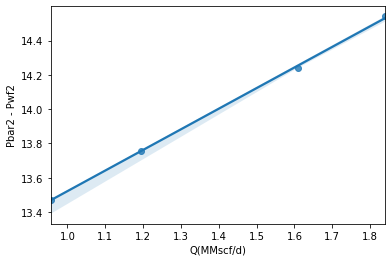

In [73]:
sns.regplot(np.log(df_isotest['Q(MMscf/d)'][:-1]),np.log(df_isotest['Pbar2 - Pwf2'][:-1]))

In [74]:
#Let's model this Equation. 
iso = np.polyfit(np.log(df_isotest['Q(MMscf/d)'][:-1]),np.log(df_isotest['Pbar2 - Pwf2'][:-1]),deg=1)

In [75]:
iso

array([ 1.20218473, 12.31940829])

### $ log_e (P_{avg}^2 - P_{wf}^{2}) = 1.202*log_e(qg) + 12.31 $

In [77]:
df_isotest.reset_index(inplace=True,drop=True)

In [78]:
df_isotest

,Test,T(hrs),Pw,Q(MMscf/d),Pbar2 - Pwf2
0,F1,12,1761,2.6,709183
1,F2,12,1694,3.3,940668
2,F3,12,1510,5.0,1530204
3,F4,12,1320,6.3,2067904
4,EF,72,1151,6.0,2485503


In [80]:
iso_q = df_isotest['Q(MMscf/d)'][:-1]
iso_p2 = df_isotest['Pbar2 - Pwf2'][:-1]

#1/n = 1.202
#n = 1/1.202
n = 1/1.202
n

0.831946755407654

### Empirical Rule 

$ Q = C*(Pbar^2 - P_w^2)^n $

$ 1/n * log(Q) + log(1/C) = log(Pbar^2 - P_w^2) $

In [81]:
#Therefore Stabilized Model becomes - 
logc_s = np.log(2485503) - (1.202)*np.log(6)

logc_s

12.572290729504617

## Stabilized (Empirical) Model for Isochronal test:-

$ log(Pbar^2 - P_w^2) = 1.202*log(Q_g) + 12.5723 $

In [115]:
def stab_iso(q):
    
    logp2 = 1.202*np.log(q) + 12.5723
    
    return np.exp(logp2)
    
    

def stab_q(pw):
    
    logq = (np.log(pbar**2 - pw**2) - 12.5723)/1.202
    
    return np.exp(logq)


aof_stab = stab_q(14.7)

In [83]:
df_isotest['Stablized : P2'] = df_isotest['Q(MMscf/d)'].apply(stab_iso)

<ipython-input-83-60681622bce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isotest['Stablized : P2'] = df_isotest['Q(MMscf/d)'].apply(stab_iso)


Text(0, 0.5, '$P_{av}^2 - Pw^2 (Psi^2) - Log Scaled$')

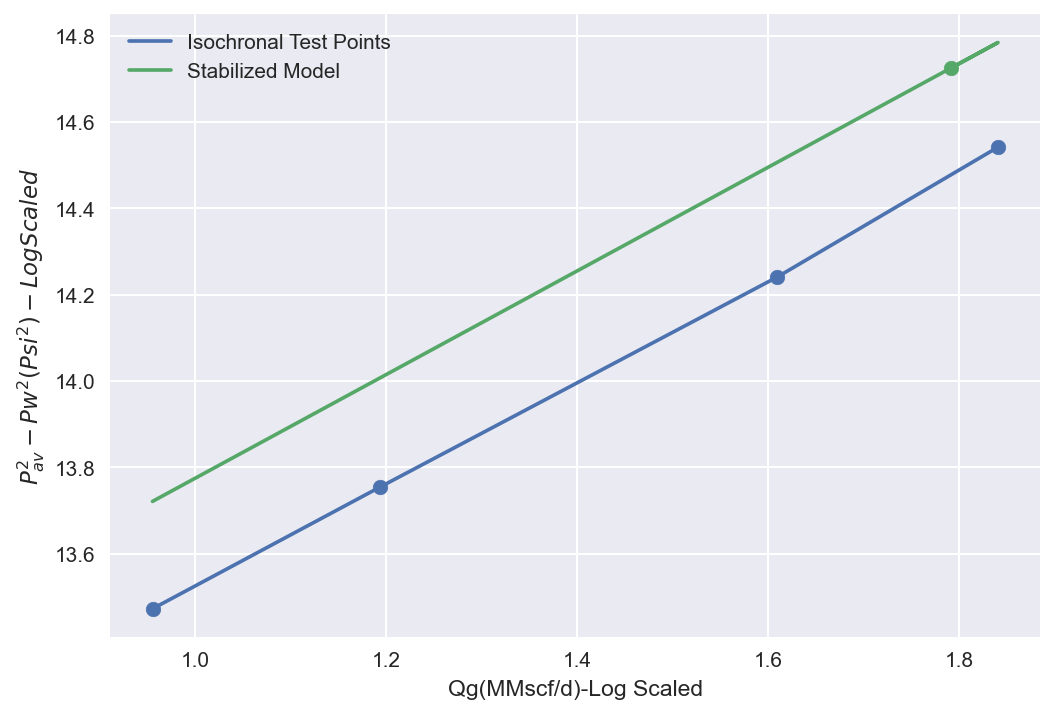

In [118]:
plt.figure(dpi=150);
plt.style.use('seaborn')
plt.grid()



#Isochronal Test Points Model (Used to find slope)
plt.scatter(np.log(df_isotest['Q(MMscf/d)'][:-1]),np.log(df_isotest['Pbar2 - Pwf2'][:-1]))
plt.plot(np.log(df_isotest['Q(MMscf/d)'][:-1]),np.log(df_isotest['Pbar2 - Pwf2'][:-1]),label='Isochronal Test Points')

x = np.log(df_isotest['Q(MMscf/d)'][:-1])
y = 1.202*x + 12.31
# plt.plot(x,y)


xf = np.log(6)
yf = np.log(2485503)

plt.scatter(xf,yf)


plt.plot(np.log(df_isotest['Q(MMscf/d)']),np.log(df_isotest['Stablized : P2']),label='Stabilized Model')


# plt.axvline(x=np.log(aof_stab), label='AOF (log-Scaled)')

plt.legend()
plt.grid()
plt.xlabel('Qg(MMscf/d)-Log Scaled')
plt.ylabel('$P_{av}^2 - Pw^2 (Psi^2) - Log Scaled$')







In [133]:
df_isotest

,Test,T(hrs),Pw,Q(MMscf/d),Pbar2 - Pwf2,Stablized : P2
0,F1,12,1761,2.6,709183,9.096587e+05
1,F2,12,1694,3.3,940668,1.211530e+06
2,F3,12,1510,5.0,1530204,1.996377e+06
3,F4,12,1320,6.3,2067904,2.635651e+06
4,EF,72,1151,6.0,2485503,2.485526e+06


In [139]:
new = {'Test':'AOF',
      'T(hrs)':'-',
      'Pw':14.7,
      'Q(MMscf/d)':aof_stab,
      'Pbar2 - Pwf2':pbar**2-14.7**2,
      'Stablized : P2':stab_iso(aof_stab)}

In [156]:
# df_isotest = df_isotest.append(new,ignore_index=True)

df_isotest

,Test,T(hrs),Pw,Q(MMscf/d),Pbar2 - Pwf2,Stablized : P2
0,F1,12,1761.0,2.600000,709183.00,9.096587e+05
1,F2,12,1694.0,3.300000,940668.00,1.211530e+06
2,F3,12,1510.0,5.000000,1530204.00,1.996377e+06
3,F4,12,1320.0,6.300000,2067904.00,2.635651e+06
4,EF,72,1151.0,6.000000,2485503.00,2.485526e+06
5,AOF,-,14.7,8.560345,3810087.91,3.810088e+06


Text(0.5, 1.0, 'Isochronal Test Results : AOF = 8.56 MMscf/D')

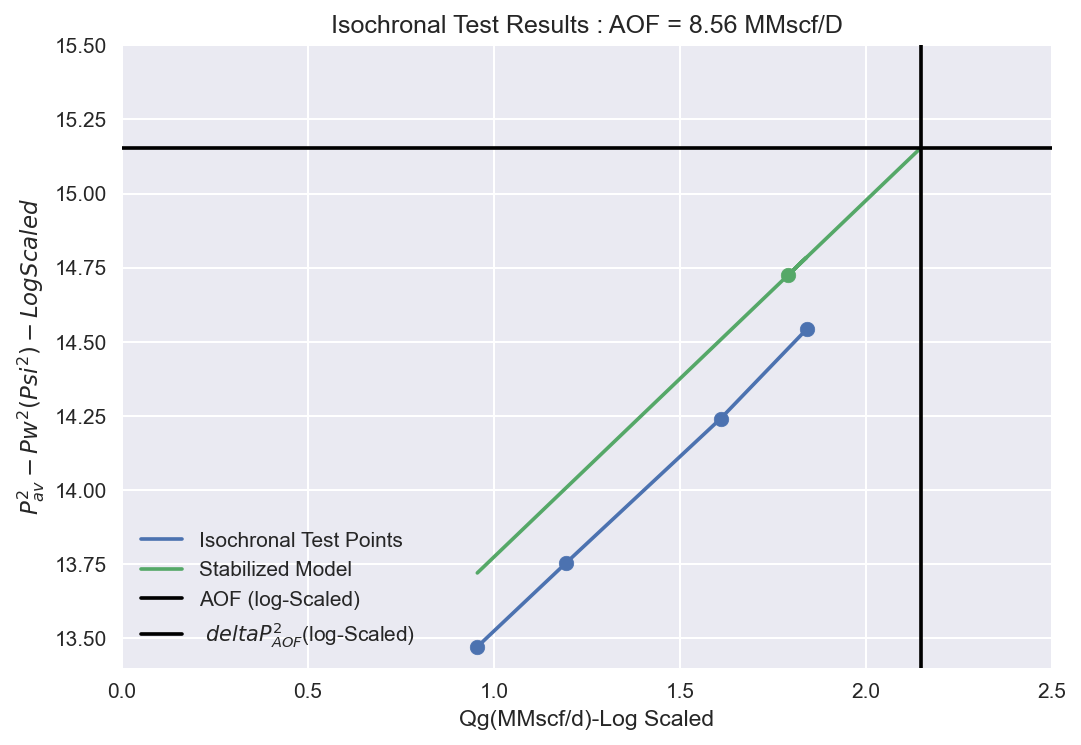

In [174]:
plt.figure(dpi=150);
plt.style.use('seaborn')
plt.grid()



#Isochronal Test Points Model (Used to find slope)
plt.scatter(np.log(df_isotest['Q(MMscf/d)'][:-2]),np.log(df_isotest['Pbar2 - Pwf2'][:-2]))
plt.plot(np.log(df_isotest['Q(MMscf/d)'][:-2]),np.log(df_isotest['Pbar2 - Pwf2'][:-2]),label='Isochronal Test Points')

x = np.log(df_isotest['Q(MMscf/d)'][:-1])
y = 1.202*x + 12.31
# plt.plot(x,y)


xf = np.log(6)
yf = np.log(2485503)

plt.scatter(xf,yf)


plt.plot(np.log(df_isotest['Q(MMscf/d)']),np.log(df_isotest['Stablized : P2']),label='Stabilized Model')


plt.axvline(x=np.log(aof_stab), label='AOF (log-Scaled)')
plt.axhline(y=np.log(3.810088e+06), label='$\ delta P_{AOF}^2$(log-Scaled)')


plt.xlim(0,2.5)
plt.ylim(13.4,15.5)

plt.legend()
plt.grid()
plt.xlabel('Qg(MMscf/d)-Log Scaled')
plt.ylabel('$P_{av}^2 - Pw^2 (Psi^2) - Log Scaled$')

plt.title('Isochronal Test Results : AOF = 8.56 MMscf/D')



In [172]:
aof_stab

8.560344627144966

In [49]:
#Theoritical Method.

In [89]:
# df_isotest['delP2/Qg'] = df_isotest['Pbar2 - Pwf2']/df_isotest['Q(MMscf/d)']

In [90]:
# df_isotest

In [91]:
# sns.regplot(df_isotest['Q(MMscf/d)'][:-1],df_isotest['delP2/Qg'][:-1])

In [92]:
# theo = np.polyfit(df_isotest['Q(MMscf/d)'][:-1],df_isotest['delP2/Qg'][:-1],deg=1)

In [93]:
# theo

In [94]:
# 